In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
import seaborn as sns
from tqdm import tqdm  # For progress bars

In [2]:
labels_native_dir = "labels_native"
labels_hd_dir = "labels_hd"
image_chips_native_dir = "image_chips_native"

In [3]:
# Count total instances of solar panels in the dataset using native labels

native_label_files = [f for f in os.listdir(labels_native_dir) if f.endswith('.txt')]
print(f"Total number of label files: {len(native_label_files)}")

total_instances = 0
for filename in native_label_files:
    file_path = os.path.join(labels_native_dir, filename)
    with open(file_path, 'r') as f:
        total_instances += len(f.readlines())

print(f"Total number of solar panel instances: {total_instances}")

Total number of label files: 2542
Total number of solar panel instances: 29625


    Number of Labels  Number of Images
0                  1                81
1                  2               167
2                  3               221
3                  4               218
4                  5               217
..               ...               ...
69                74                 5
70                75                 1
71                76                 2
72                77                 2
73                78                 1

[74 rows x 2 columns]


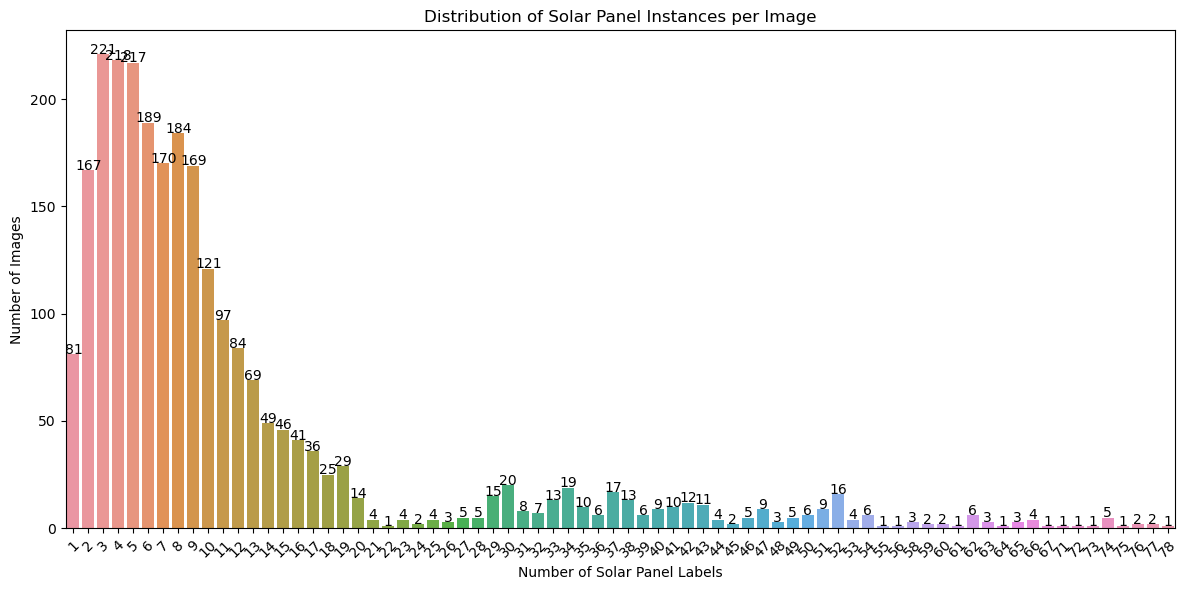

In [4]:
# Calculate value counts of labels per image
# Dictionary to store count of labels per image
label_counts = {}

# Iterate through each label file
for filename in native_label_files:
    file_path = os.path.join(labels_native_dir, filename)
    # Count lines in file (each line represents one solar panel)
    with open(file_path, 'r') as f:
        count = len(f.readlines())
    label_counts[filename] = count

# Create frequency distribution
count_distribution = Counter(label_counts.values())

# Convert to DataFrame for display
df_counts = pd.DataFrame([
    {"Number of Labels": count, "Number of Images": freq} 
    for count, freq in sorted(count_distribution.items())
])

print(df_counts)

# Plot the distribution of labels per image
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Number of Labels", y="Number of Images", data=df_counts)
plt.title("Distribution of Solar Panel Instances per Image")
plt.xlabel("Number of Solar Panel Labels")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)

# Add count labels on top of each bar
for i, count in enumerate(df_counts["Number of Images"]):
    ax.text(i, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

In [5]:
# 2. Calculate statistics of the area of solar panels in meters

# Function to calculate area in square meters
def calculate_area(norm_x_width, norm_y_width, chip_size=416, pixel_size=0.31):
    width_m = norm_x_width * chip_size * pixel_size
    height_m = norm_y_width * chip_size * pixel_size
    return width_m * height_m

# Lists to store areas and dimensions
areas = []
widths = []
heights = []

# Process each label file
for filename in tqdm(native_label_files, desc="Processing files"):
    file_path = os.path.join(labels_native_dir, filename)
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:  # category, x-center, y-center, x-width, y-width
                norm_x_width = float(parts[3])
                norm_y_width = float(parts[4])
                
                # Calculate dimensions in meters
                width_m = norm_x_width * 416 * 0.31
                height_m = norm_y_width * 416 * 0.31
                
                # Store values
                widths.append(width_m)
                heights.append(height_m)
                areas.append(width_m * height_m)

# Convert to numpy arrays for calculations
areas = np.array(areas)
widths = np.array(widths)
heights = np.array(heights)

Processing files: 100%|███████████████████████████████████████████████████████████| 2542/2542 [00:02<00:00, 970.93it/s]


In [6]:
# Calculate mean area and standard deviation
mean_area = np.mean(areas)
median_area = np.median(areas)
std_area = np.std(areas)
min_area = np.min(areas)
max_area = np.max(areas)

print(f"Area Statistics (square meters):")
print(f"Mean area: {mean_area:.2f}")
print(f"Median area: {median_area:.2f}")
print(f"Standard deviation: {std_area:.2f}")
print(f"Minimum area: {min_area:.2f}")
print(f"Maximum area: {max_area:.2f}")

# Statistics for dimensions
print(f"\nDimension Statistics (meters):")
print(f"Mean width: {np.mean(widths):.2f}, Mean height: {np.mean(heights):.2f}")
print(f"Median width: {np.median(widths):.2f}, Median height: {np.median(heights):.2f}")

Area Statistics (square meters):
Mean area: 191.52
Median area: 91.68
Standard deviation: 630.70
Minimum area: 1.06
Maximum area: 12177.41

Dimension Statistics (meters):
Mean width: 15.59, Mean height: 9.54
Median width: 11.16, Median height: 7.44


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


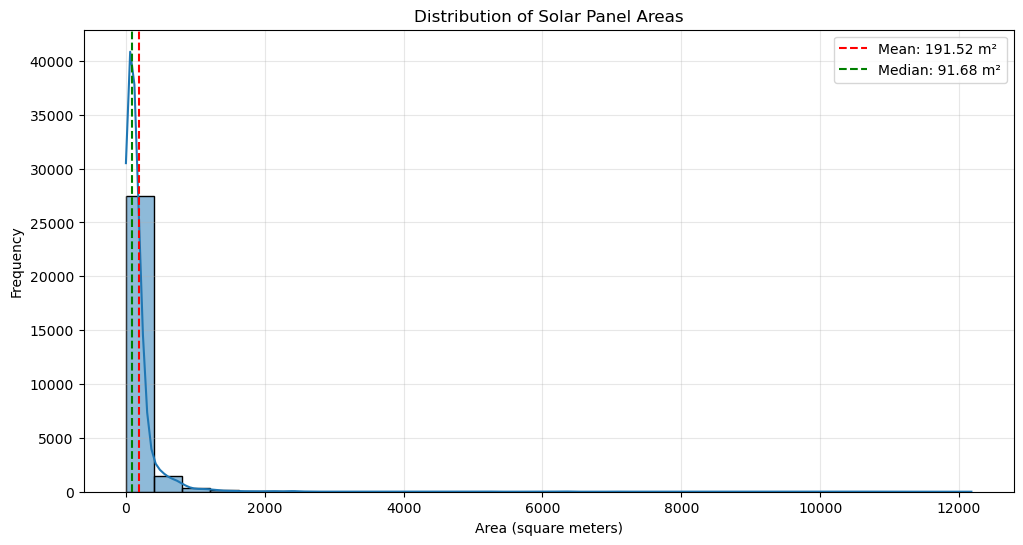

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


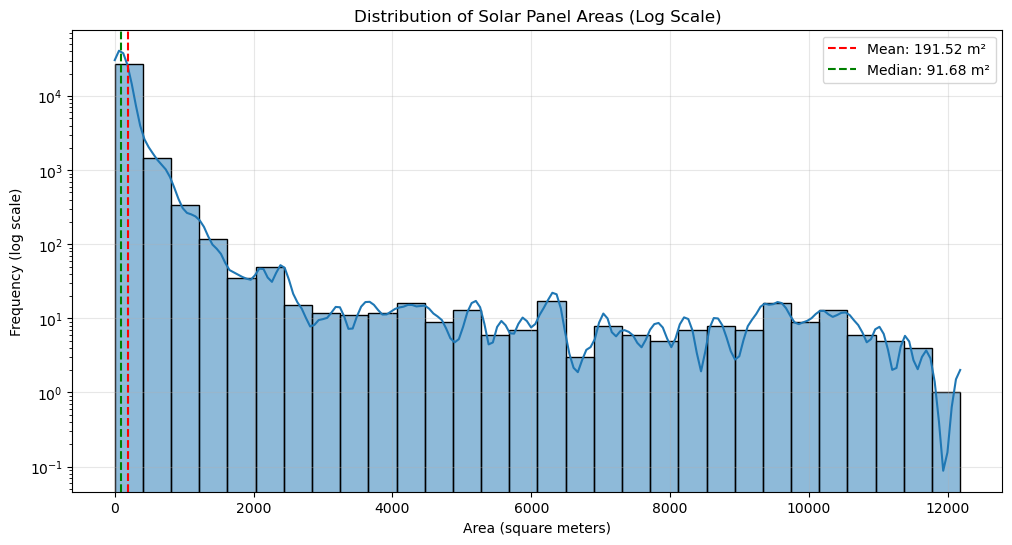

In [7]:
# Plot histogram of areas
plt.figure(figsize=(12, 6))
sns.histplot(areas, bins=30, kde=True)
plt.title("Distribution of Solar Panel Areas")
plt.xlabel("Area (square meters)")
plt.ylabel("Frequency")
plt.axvline(mean_area, color='red', linestyle='--', label=f'Mean: {mean_area:.2f} m²')
plt.axvline(median_area, color='green', linestyle='--', label=f'Median: {median_area:.2f} m²')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Log-scale histogram to better visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(areas, bins=30, kde=True, log_scale=(False, True))
plt.title("Distribution of Solar Panel Areas (Log Scale)")
plt.xlabel("Area (square meters)")
plt.ylabel("Frequency (log scale)")
plt.axvline(mean_area, color='red', linestyle='--', label=f'Mean: {mean_area:.2f} m²')
plt.axvline(median_area, color='green', linestyle='--', label=f'Median: {median_area:.2f} m²')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

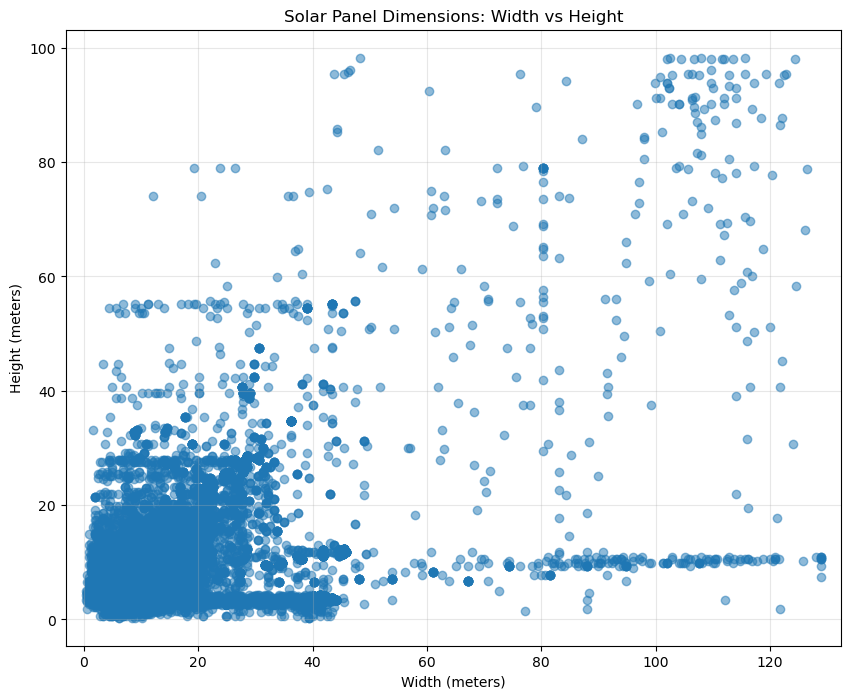

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


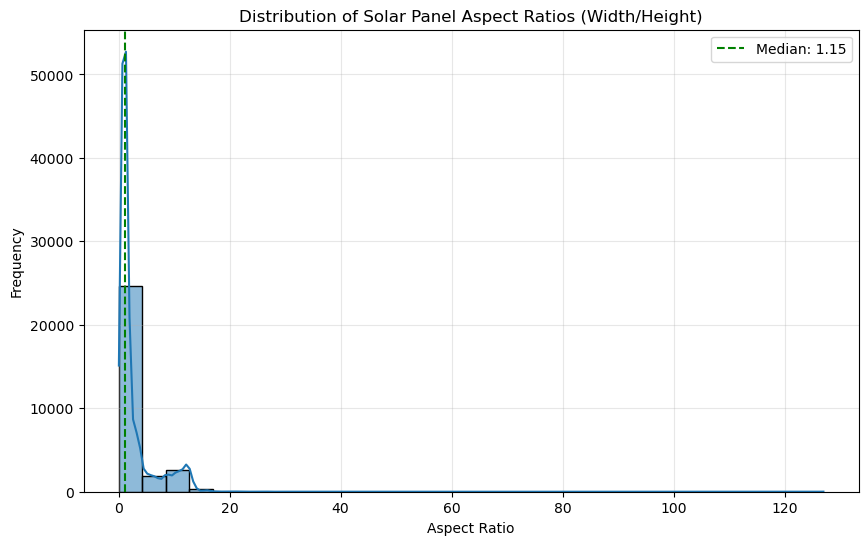

In [8]:
# Scatter plot of width vs height
plt.figure(figsize=(10, 8))
plt.scatter(widths, heights, alpha=0.5)
plt.title("Solar Panel Dimensions: Width vs Height")
plt.xlabel("Width (meters)")
plt.ylabel("Height (meters)")
plt.grid(True, alpha=0.3)
plt.axis('equal')  # Equal scaling for width and height
plt.show()

# Calculate aspect ratio (width/height)
aspect_ratios = widths / heights
plt.figure(figsize=(10, 6))
sns.histplot(aspect_ratios, bins=30, kde=True)
plt.title("Distribution of Solar Panel Aspect Ratios (Width/Height)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.axvline(np.median(aspect_ratios), color='green', linestyle='--', 
            label=f'Median: {np.median(aspect_ratios):.2f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()